In [4]:
library(rethinking)
data(milk)
d <- milk

d$K <- standardize( d$kcal.per.g )
d$N <- standardize( d$neocortex.perc )
d$M <- standardize( log(d$mass) )

dcc <- d[ complete.cases(d$K,d$N,d$M) , ]

In [5]:
m5.5_draft <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N ,
a ~ dnorm( 0 , 1 ) ,
bN ~ dnorm( 0 , 1 ) ,
sigma ~ dexp( 1 )
) , data=dcc )

In [6]:
prior <- extract.prior( m5.5_draft )
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )

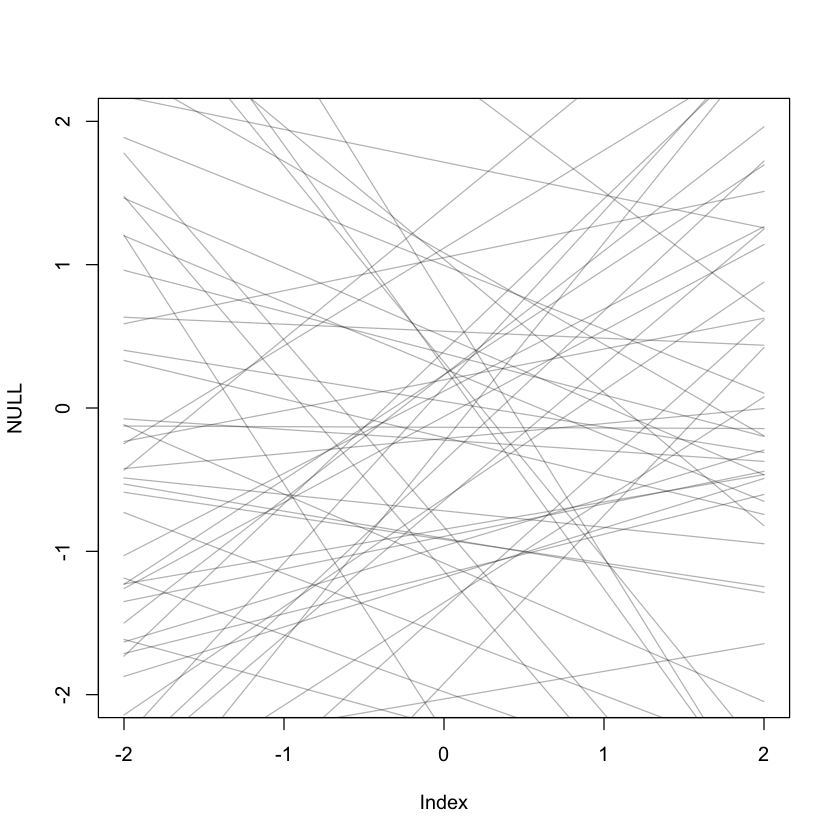

In [7]:
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

In [8]:
m5.5 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N ,
a ~ dnorm( 0 , 0.2 ) ,
bN ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=dcc )

In [9]:
precis( m5.5 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03994002,0.1544908,-0.2069660,0.2868461
bN,0.13323494,0.2237468,-0.2243557,0.4908256
sigma,0.99982020,0.1647080,0.7365850,1.2630554


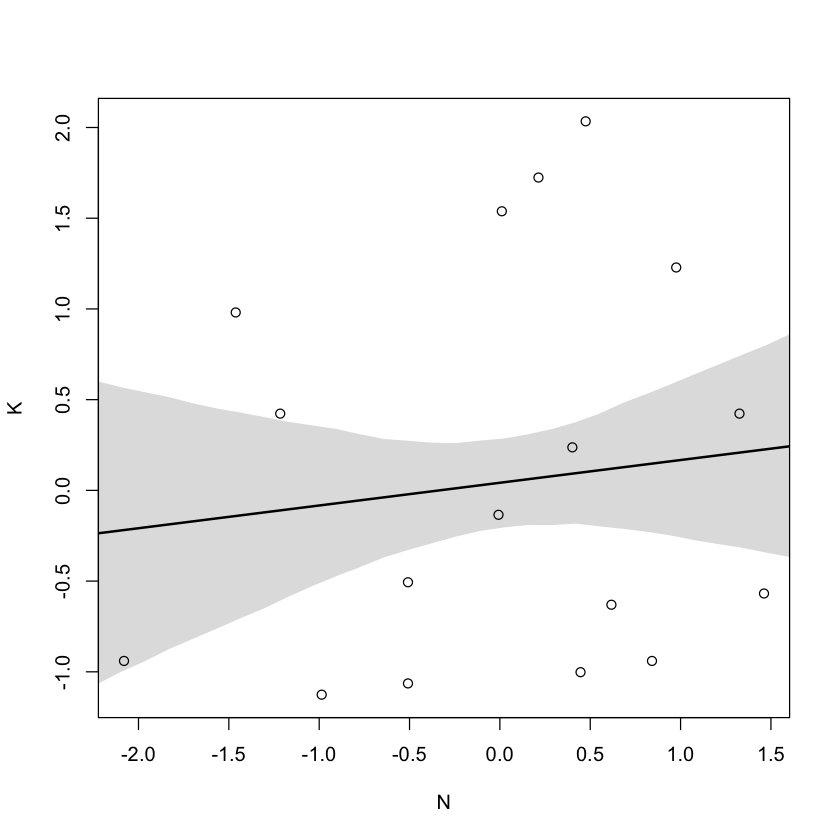

In [10]:
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.5 , data=list(N=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ N , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )